<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S8_C5_PLN_lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Iván Andrés Trujillo Abella


# ivantrujillo1229@gmail.com

In [1]:
import pandas as pd

In [2]:
# Sirve para trabajar con texto en español
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 69.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# MiniReto: Agrupar las letras de las canciones por género

In [53]:
url  = "https://raw.githubusercontent.com/it-ces/Datasets/main/lyrics-label.txt"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lyrics  208 non-null    object
 1   label   208 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


# Pruebas individuales

* Bajar texto a  minúscula
* Eliminar saltos de líneas (\n)
* Eliminar conectores
* Eliminar palabras específicas (bis)

In [54]:
df['lyrics'][85]

'\nSiento tu amor frente a mi\ncomo el marino que regresa al puerto\ncomo estudiante en su desespero\ncuando en vacaciones a su pueblo va\n\nllega en busca de su amor\nallí lo espera su novia querida\nese anhelo tengo yo\ny así te siento amor de mi vida (bis)\n\nSi el caudaloso río, trata de salvar sus aguas\nbuscando recorridos que sena menos dolorosos (bis)\n\nY así lo mas bonito seria la unión de nosotros\nencontrar con tu amor, la salvación de mi alma (bis)\n\nSiento tu amor frente a mi\ncomo las aves que cruzan los cielos\nque ya cansadas de su largo vuelo\nbuscan los árboles para dormir\n\nLlevan calor a sus hijos\npa protegerlos del hambre y del frío\ny yo buscare a tu lado\nla protección del amor mío (bis)\n\nSi el caudaloso río, trata de salvar sus aguas\nbuscando recorridos que sena menos dolorosos (bis)\n\ny así lo mas bonito seria la unión de nosotros\nencontrar con tu amor, la salvación de mi alma (bis)\n'

# Pruebas individuales

<.lower()>
* Bajar texto a  minúscula
* Eliminar conectores

<re.sub>
* Eliminar palabras específicas (bis)
* Eliminar saltos de líneas (\n)

In [55]:
import re
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [56]:
texto_prueba = "Liceo\nComo es estudiante\nya se  Escalona\npero de recuerdo te dejó un paseo (bis)\n\nQue te habla..."

In [57]:
texto_minus = texto_prueba.lower()
## Reemplaza un salto de línea
# Eliminar los espacios dobles
texto_procesado =  re.sub('  ', ' ', re.sub('\n', ' ', texto_minus))
texto_procesado =  re.sub(r"\s*\(bis\)",'',texto_procesado) ###
texto_procesado

'liceo como es estudiante ya se escalona pero de recuerdo te dejó un paseo que te habla...'

In [58]:
def pre_clean(texto_prueba):
  texto_minus = texto_prueba.lower()
  ## Reemplaza un salto de línea
  # Eliminar los espacios dobles
  texto_procesado =  re.sub('  ', ' ', re.sub('\n', ' ', texto_minus))
  texto_procesado =  re.sub(r"\s*\(bis\)",'',texto_procesado)
  return texto_procesado

In [59]:
nlp = spacy.load('es_core_news_sm')

In [60]:
def clean_text(text):
  text = nlp(text)
  text = ' '.join([token.lemma_ for token in text if not token.is_stop and not token.is_punct])
  return text

In [61]:
texto_prueba = "Liceo\nComo es estudiante\nya se  Escalona\npero de recuerdo te dejó un paseo (bis)\n\nQue te habla..."

In [62]:
clean_text(texto_prueba)

'Liceo \n estudiante \n   Escalona \n recuerdo paseo bis \n\n'

In [63]:
clean_text(texto_procesado)

'liceo estudiante escalonar recuerdo paseo'

In [64]:
texto2 = "sus aguas\nbuscando recorridos que sena menos dolorosos (bis)\n\nY así lo mas bonito seria la unión de nosotros\nencontrar con tu amor, la salvación de mi alma (bis)\n"
texto2

'sus aguas\nbuscando recorridos que sena menos dolorosos (bis)\n\nY así lo mas bonito seria la unión de nosotros\nencontrar con tu amor, la salvación de mi alma (bis)\n'

In [65]:
texto_temp = pre_clean(texto2)
texto_temp

'sus aguas buscando recorridos que sena menos dolorosos y así lo mas bonito seria la unión de nosotros encontrar con tu amor, la salvación de mi alma '

In [66]:
texto_fin = clean_text(texto_temp)
texto_fin

'agua buscar recorrido senar doloroso bonito serio unión encontrar amor salvación alma'

# Parte 1. Limpieza de la columna lyrics

In [67]:
df['lyrics_clean'] = df['lyrics'].apply(lambda x : clean_text(pre_clean(x)))


In [72]:
df['lyrics'][53]

'Anhelos tengo de verte vida mía\nAnhelos de sentirte cerca de mí\nAnhelos de besarte noche y día\n\nY es que mi amor solo existe para ti\nTú fuiste la ilusión de un hombre joven\nSin experiencia en las reglas del amor\nQue como un tonto cayó bajo tus redes\nTendidas con engaño y con traición\n\nSi los anhelos se cumplen\nSe curarán las heridas\nDe un alma triste y sentida\nQue es por tu causa que sufre\n\nSi los anhelos se cumplen\nSe curarán las heridas\nDe un alma triste y sentida\nQue es por tu causa que sufre\n\nSi los anhelos se cumplen\nSe curarán las heridas\nDe un alma triste y sentida\nQue es por tu causa que sufre\n'

In [73]:
df['lyrics_clean'][53]

'anhelo verte vida anhelo sentirte cerca anhelo besarte noche amor fuistir ilusión hombre joven experiencia regla amor tonto caer red tendido engaño traición anhelo cumplir curar herida alma triste sentido causa sufrir anhelo cumplir curar herida alma triste sentido causa sufrir anhelo cumplir curar herida alma triste sentido causa sufrir'

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lyrics_clean']).toarray()

Hasta aquí la clase S8_C5

Se continua en S9_C1

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [83]:
from sklearn.decomposition import PCA
# Reduce dimensionaity to three!
features = X.copy()
pca = PCA(n_components=2, random_state=42)
X = pca.fit_transform(X)

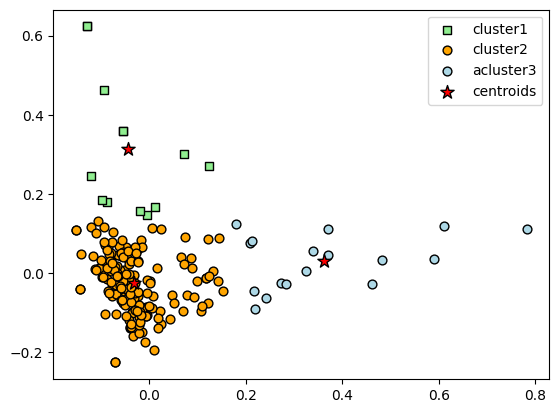

In [88]:
km = KMeans(n_clusters = 3,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)